# Pre- Requisites

In [1]:
#Importing python package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Analysis with Pandas using California Housing Dataset:

In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

data = fetch_california_housing(as_frame=True)
df = data.frame


**Data Setup**

In [3]:
#Print the first 5 dataset
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
#Get the information about the dataframe realed to columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
#Displays statistics of the columns
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# Problem 1 - Sorting

In [4]:
med_income = df[['MedInc']]
print(med_income.head())

pop_lat = df[['Population', 'Latitude']]
print(pop_lat.head())

house_age_rooms = df[['HouseAge', 'AveRooms']]
print(house_age_rooms.head())


   MedInc
0  8.3252
1  8.3014
2  7.2574
3  5.6431
4  3.8462
   Population  Latitude
0       322.0     37.88
1      2401.0     37.86
2       496.0     37.85
3       558.0     37.85
4       565.0     37.85
   HouseAge  AveRooms
0      41.0  6.984127
1      21.0  6.238137
2      52.0  8.288136
3      52.0  5.817352
4      52.0  6.281853


# Problem 2 - Subsetting

In [7]:
# Subsetting rows
high_income = df[df['MedInc'] > 8.0]
north_california = df[df['Latitude'] > 37]
spacious_low_occupancy = df[(df['AveRooms'] > 6.0) & (df['AveOccup'] < 2.0)]

# Creating Region column
def region_class(lat):
    if lat > 37:
        return 'North'
    elif 35 < lat <= 37:
        return 'Central'
    else:
        return 'South'

df['Region'] = df['Latitude'].apply(region_class)

north_central_region = df[df['Region'].isin(['North', 'Central'])]


# Problem 3 - Exploratory Data Analysis

In [8]:
df['value_per_room'] = df['MedHouseVal'] / df['AveRooms']
high_vpr = df[df['value_per_room'] > 1]
high_vpr_sorted = high_vpr.sort_values(by='value_per_room', ascending=False)
print(high_vpr_sorted[['MedHouseVal', 'AveRooms', 'value_per_room']].head())

df['income_per_person'] = df['MedInc'] / df['Population']
dense_areas = df[df['Population'] > 5000]
rich_dense_areas = dense_areas.sort_values(by='income_per_person', ascending=False)
print(rich_dense_areas[['MedInc', 'Population', 'income_per_person']].head())


       MedHouseVal  AveRooms  value_per_room
15660      5.00001  1.824719        2.740153
15654      4.50000  1.902087        2.365823
4559       5.00001  2.148148        2.327591
15652      5.00001  2.237474        2.234667
15661      5.00001  2.297872        2.175930
       MedInc  Population  income_per_person
9004   9.1232      5452.0           0.001673
20427  8.6499      5495.0           0.001574
9027   7.7848      5175.0           0.001504
5724   8.1657      5459.0           0.001496
9013   9.1228      6214.0           0.001468


# Problem 4 - Group By Exercises

In [9]:
# Q1: Percent of total house value per Region
total_value = df['MedHouseVal'].sum()
region_value = df.groupby('Region')['MedHouseVal'].sum()
percent_value = (region_value / total_value) * 100
print(percent_value)

# Q2: Age Group distribution
def age_group(age):
    if age < 20:
        return 'New'
    elif age < 40:
        return 'Mid'
    else:
        return 'Old'

df['AgeGroup'] = df['HouseAge'].apply(age_group)
total_houses = len(df)
age_group_count = df['AgeGroup'].value_counts()
age_group_percent = (age_group_count / total_houses) * 100
print(age_group_percent)


Region
Central     5.195671
North      36.267665
South      58.536663
Name: MedHouseVal, dtype: float64
AgeGroup
Mid    51.501938
New    28.236434
Old    20.261628
Name: count, dtype: float64


# Section 2- Numpy

In [10]:
import numpy as np


**Warmup Exercise**

In [11]:
# Array Creation
arr1 = np.arange(20)
arr2 = arr1.reshape(4, 5)
identity = np.eye(5)
filled_7 = np.full((3, 3), 7)


**Basic Operation**

In [12]:
A = np.random.randint(0, 10, (3, 3))
B = np.random.randint(0, 10, (3, 3))

add = A + B
multiply = A * B
divide = A / (B + 1e-6)  # avoid division by zero
matmul = A @ B

stats = {
    "mean_A": A.mean(), "median_A": np.median(A), "std_A": A.std(), "sum_A": A.sum(),
    "mean_B": B.mean(), "median_B": np.median(B), "std_B": B.std(), "sum_B": B.sum()
}


**Indexing and Slicing**

In [13]:
slice_rows = A[:2, :]
greater_than_5 = A[A > 5]
A[A % 2 == 0] = -1


** Advanced Exercises**

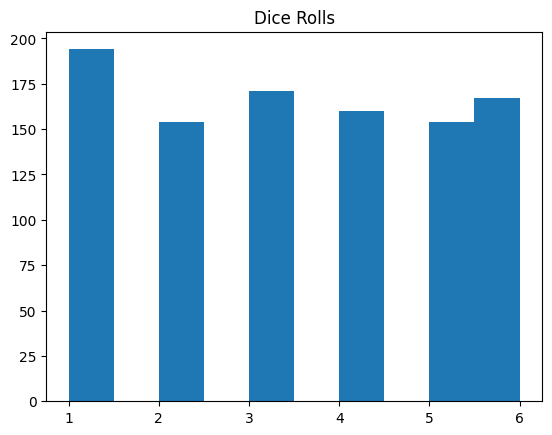

In [14]:
# Broadcasting
col_vec = np.arange(3).reshape(3, 1)
row_vec = np.arange(4).reshape(1, 4)
broadcasted = col_vec * row_vec

# Vectorization vs Loops
def square_loop(arr):
    return np.array([x**2 for x in arr])

def square_vectorized(arr):
    return arr ** 2

arr = np.random.randint(0, 100, 1000)
# use %timeit in Jupyter to compare

# Simulations
tosses = np.random.choice(['H', 'T'], 1000)
proportion_heads = np.mean(tosses == 'H')

dice = np.random.randint(1, 7, 1000)
import matplotlib.pyplot as plt
plt.hist(dice)
plt.title("Dice Rolls")
plt.show()

# Solving System
# 3x + y = 9 ; 9x + 2y = 8
A_eq = np.array([[3, 1], [9, 2]])
b_eq = np.array([9, 8])
solution = np.linalg.solve(A_eq, b_eq)


# Section 3 - Visualization

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


**Basic Plotting**

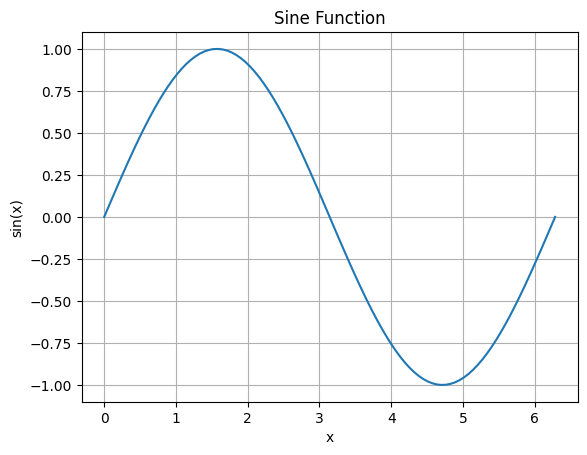

In [16]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

plt.plot(x, y)
plt.title("Sine Function")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.grid(True)
plt.savefig("sine_plot.png")
plt.show()


**Histograms and Bar Plots**

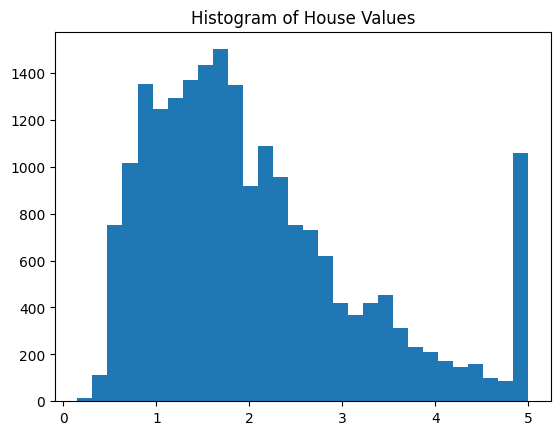

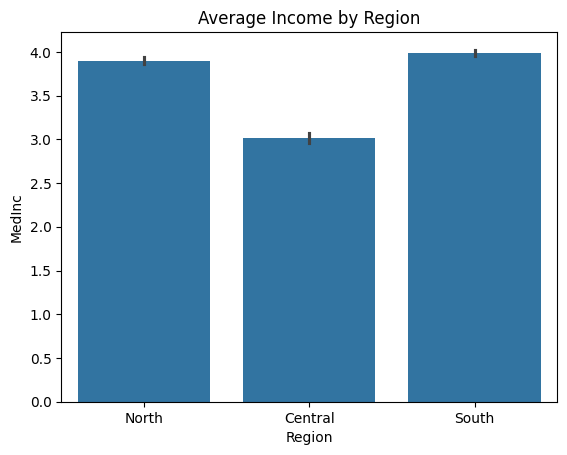

In [17]:
plt.hist(df['MedHouseVal'], bins=30)
plt.title("Histogram of House Values")
plt.show()

sns.barplot(x='Region', y='MedInc', data=df)
plt.title("Average Income by Region")
plt.show()


**Scatter Plot**

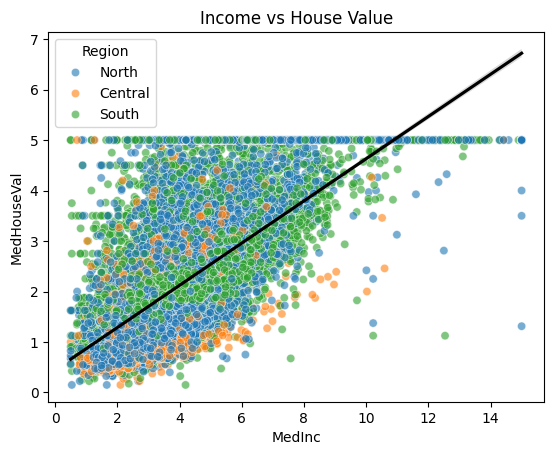

In [18]:
sns.scatterplot(x='MedInc', y='MedHouseVal', hue='Region', data=df, alpha=0.6)
sns.regplot(x='MedInc', y='MedHouseVal', data=df, scatter=False, color='black')
plt.title("Income vs House Value")
plt.show()


**Subplots**

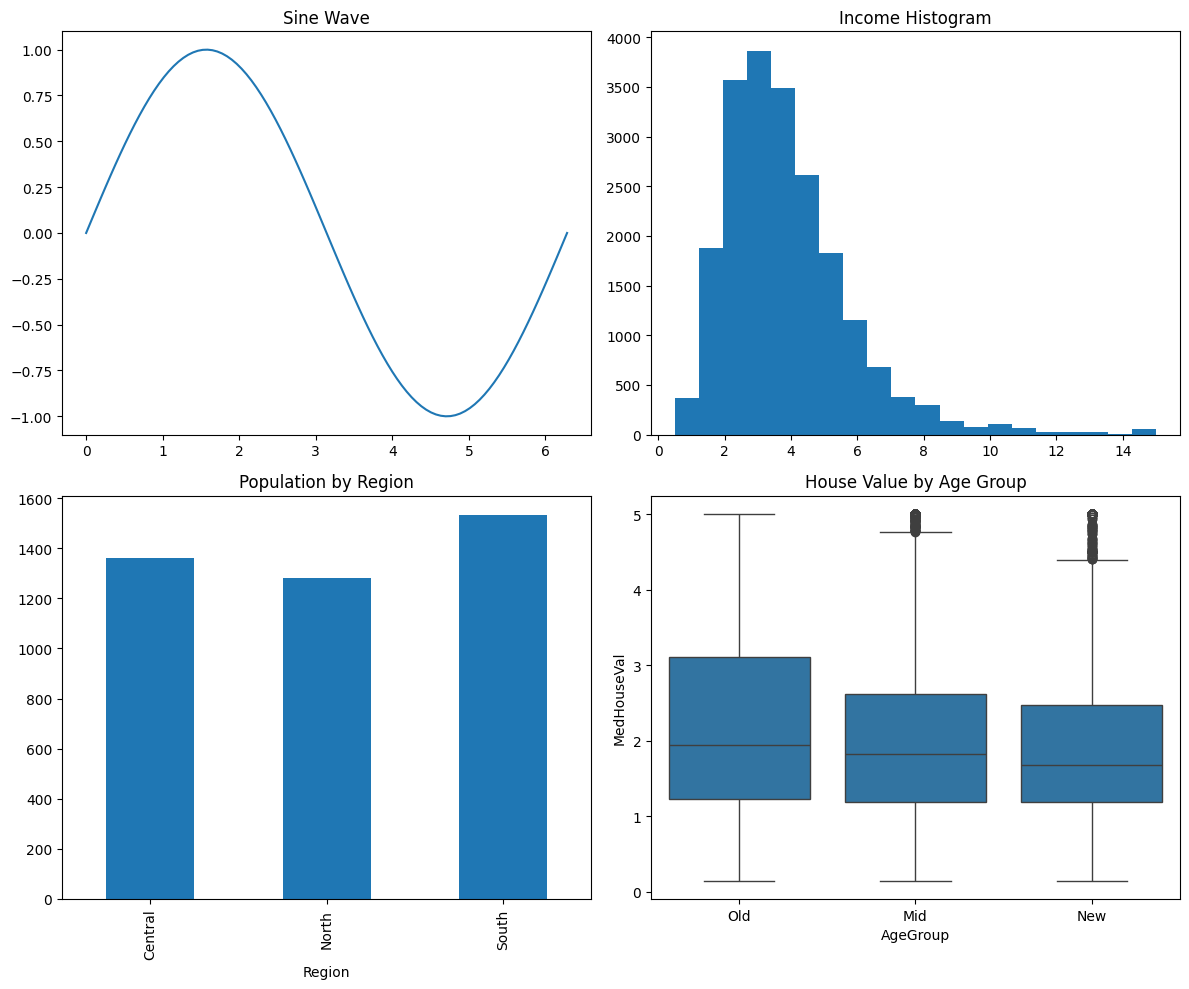

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].plot(x, y)
axs[0, 0].set_title("Sine Wave")

axs[0, 1].hist(df['MedInc'], bins=20)
axs[0, 1].set_title("Income Histogram")

df.groupby('Region')['Population'].mean().plot(kind='bar', ax=axs[1, 0])
axs[1, 0].set_title("Population by Region")

sns.boxplot(x='AgeGroup', y='MedHouseVal', data=df, ax=axs[1, 1])
axs[1, 1].set_title("House Value by Age Group")

plt.tight_layout()
plt.show()


**Advanced Visualizations**

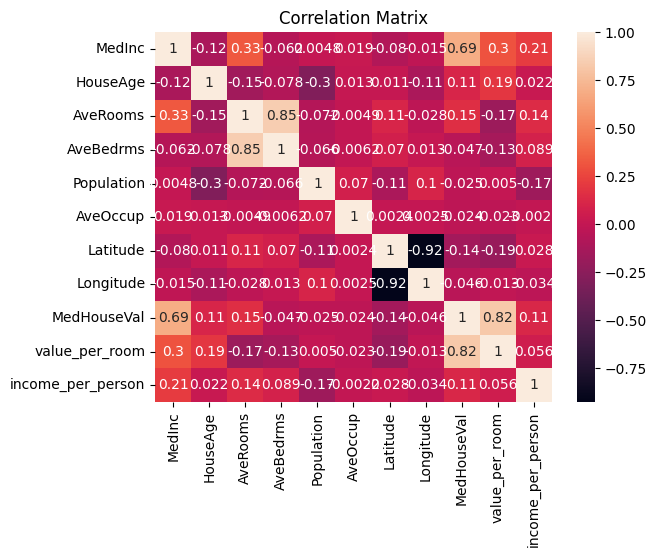

In [21]:
# Heatmap
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True)
plt.title("Correlation Matrix")
plt.show()




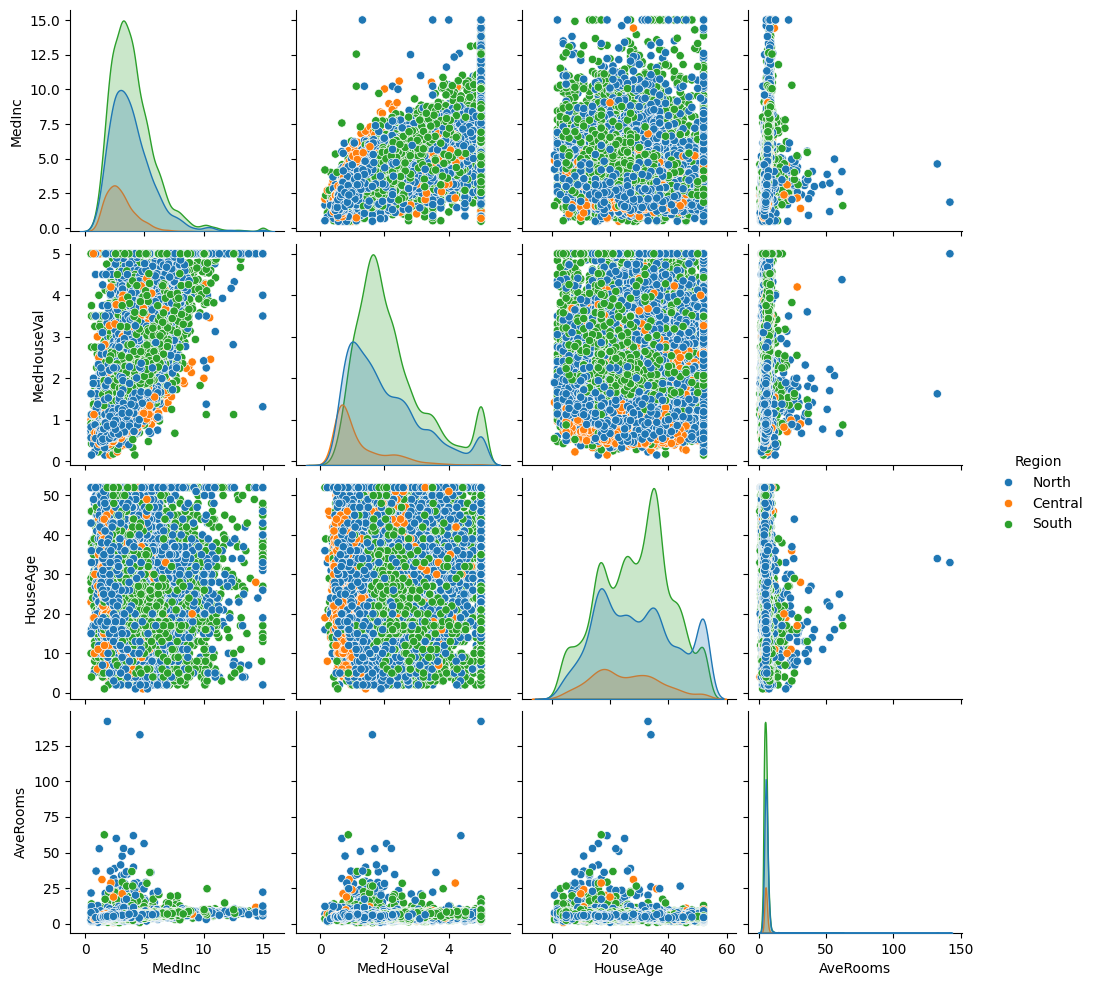

In [22]:
# Pairplot
sns.pairplot(df[['MedInc', 'MedHouseVal', 'HouseAge', 'AveRooms', 'Region']], hue='Region')
plt.show()



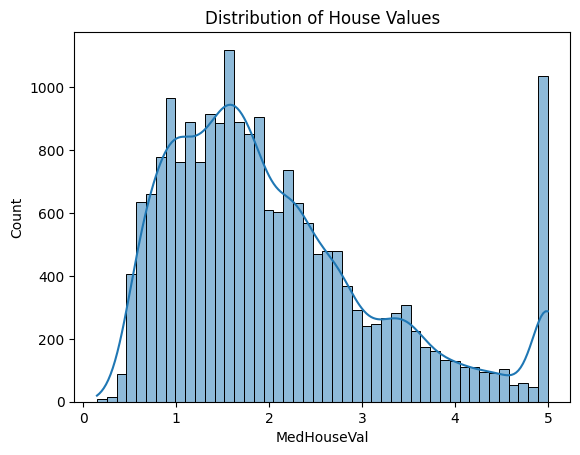

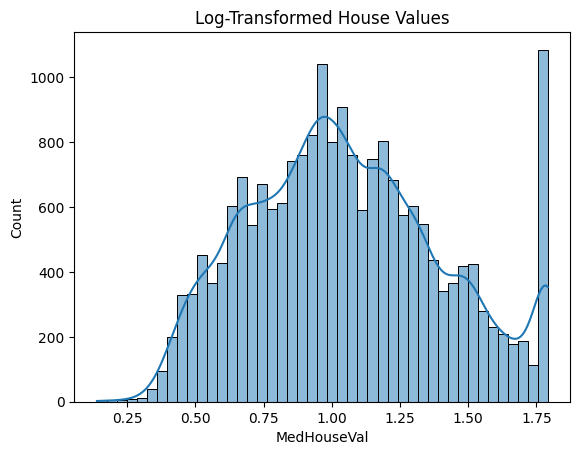

In [23]:
# Distribution Analysis
sns.histplot(df['MedHouseVal'], kde=True)
plt.title("Distribution of House Values")
plt.show()

sns.histplot(np.log1p(df['MedHouseVal']), kde=True)
plt.title("Log-Transformed House Values")
plt.show()